In [1]:
import numpy as np
import seaborn as sn
from keras.utils import to_categorical
import pandas as pd
import matplotlib.pyplot as plt
import collections
from collections import Counter
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import os
from PIL import Image
from pathlib import Path
import time
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
train_path = "traffic_sign_data//Train//"
test_path = "traffic_sign_data//Test//"
test_label_path = "traffic_sign_data//Test.csv"
meta_path = "traffic_sign_data//Meta"

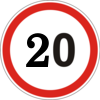

In [3]:
image_label_0 = "//0.png"
img_0 = Image.open("traffic_sign_data//Meta" + image_label_0)
img_0

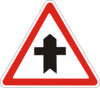

In [4]:
image_label_11 = "//11.png"
img_11 = Image.open("traffic_sign_data//Meta" + image_label_11)
img_11

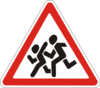

In [5]:
image_label_28 = "//28.png"
img_28 = Image.open("traffic_sign_data//Meta" + image_label_28)
img_28

In [6]:
# read in train images and respective labels

start = time.time()

dir_list = os.listdir(train_path)
train_images = []
train_label = []
    
for i in range(len(dir_list)):
    actual_label = dir_list[i]
    actual_path = train_path + str(dir_list[i])
    pathlist = Path(actual_path).glob('**/*.png')

    for path in pathlist:
        path_in_str = str(path)
        img = Image.open(path_in_str)
        img = img.resize((32,32))
        img = np.asanyarray(img)
        train_images.append(img)
        train_label.append(actual_label)

arr_train_images = np.asanyarray(train_images)
arr_train_label = np.asanyarray(train_label)
print(arr_train_images.shape)
print(arr_train_label.shape)

end = time.time()

print("Time taken: ", round(end-start, 0), "seconds")

(39209, 32, 32, 3)
(39209,)
Time taken:  13.0 seconds


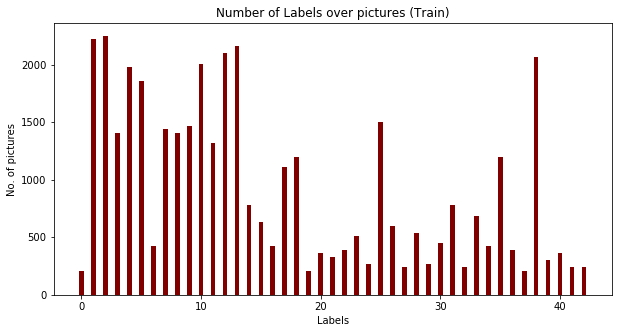

In [7]:
train_label_dict = Counter(train_label)

label = []
count = []
for i in range (len(train_label_dict.keys())):
    label.append(i)
    value = train_label_dict.get(str(i))
    count.append(value)

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(label, count, color ='maroon', 
        width = 0.4)
 
plt.xlabel("Labels")
plt.ylabel("No. of pictures")
plt.title("Number of Labels over pictures (Train)")
plt.show()    

In [8]:
# get test labels

df = pd.read_csv(test_label_path)

df = df["ClassId"]
test_label = df.values

arr_test_label = np.asanyarray(test_label)
print(arr_test_label.shape)

(12630,)


In [9]:
start = time.time()

pathlist_test = Path(test_path).glob('**/*.png')

test_images = []

for path in pathlist_test:
    path_in_str = str(path)
    img = Image.open(path_in_str)
    img = img.resize((32,32))
    img = np.asanyarray(img)
    test_images.append(img)
    
arr_test_images = np.asanyarray(test_images)
print(arr_test_images.shape)

end = time.time()
print("Time taken: ", round(end-start, 0), "seconds")

(12630, 32, 32, 3)
Time taken:  4.0 seconds


In [10]:
X, y = shuffle(arr_train_images, arr_train_label, random_state=20)
X_test, y_test = shuffle(arr_test_images, arr_test_label, random_state=20)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

In [12]:
y_train = to_categorical(y_train, num_classes = len(dir_list))
y_val = to_categorical(y_val, num_classes = len(dir_list))
y_test = to_categorical(y_test, num_classes = len(dir_list))

In [13]:
X_train = X_train.astype(np.float32)/255.
X_val = X_val.astype(np.float32)/255.
X_test = X_test.astype(np.float32)/255.

In [14]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3), padding = "same"))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", padding = "same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding = "same"))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding = "same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", padding = "same"))
model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", padding = "same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dense(43, activation="softmax"))

#activation: softmax, sigmoid
#optimizer: adam, sgd

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)    

In [15]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

In [16]:
filepath="checkpoint//weights-improvement-{epoch:02d}-{val_acc:.2f}.h5"
checkpoint = ModelCheckpoint(filepath=filepath,
    monitor='val_acc',
    verbose = 1,
    mode='max',
    save_best_only=True)
callbacks_list = [checkpoint]

In [17]:
history = model.fit(datagen.flow(X_train, y_train, batch_size = 130), 
                    epochs = 20, validation_data=(X_val, y_val), callbacks=callbacks_list)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
11763/11763 [==============================] - 10s 873us/sample - loss: 3.0405 - acc: 0.1292

Epoch 00001: val_acc improved from -inf to 0.12922, saving model to checkpoint//weights-improvement-01-0.13.h5
212/212 [==============================] - 93s 441ms/step - loss: 3.3441 - acc: 0.0932 - val_loss: 3.0399 - val_acc: 0.1292
Epoch 2/20
11763/11763 [==============================] - 10s 839us/sample - loss: 2.1077 - acc: 0.3328

Epoch 00002: val_acc improved from 0.12922 to 0.33282, saving model to checkpoint//weights-improvement-02-0.33.h5
212/212 [==============================] - 89s 419ms/step - loss: 2.8717 - acc: 0.1850 - val_loss: 2.1068 - val_acc: 0.3328
Epoch 3/20
11763/11763 [==============================] - 10s 847us/sample - loss: 1.3680 - acc: 0.5303

Epoch 00003: val_acc improved from 0.33282 to 0.53031, saving model to checkpoint//weights-improvement-03-0.53.h5
212/212 [==============================] - 87s 410

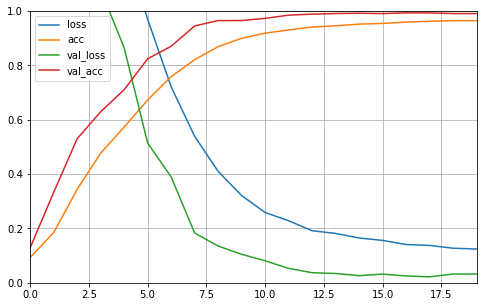

In [21]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [18]:
best_model_path = ("checkpoint/weights-improvement-17-0.99.h5")

model = keras.models.load_model(best_model_path)

In [19]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis = 1)
y_test = np.argmax(y_test,axis = 1)

In [22]:
accuracy_score(y_test, y_pred)

0.9636579572446555

In [23]:
conf = confusion_matrix(y_test, y_pred)

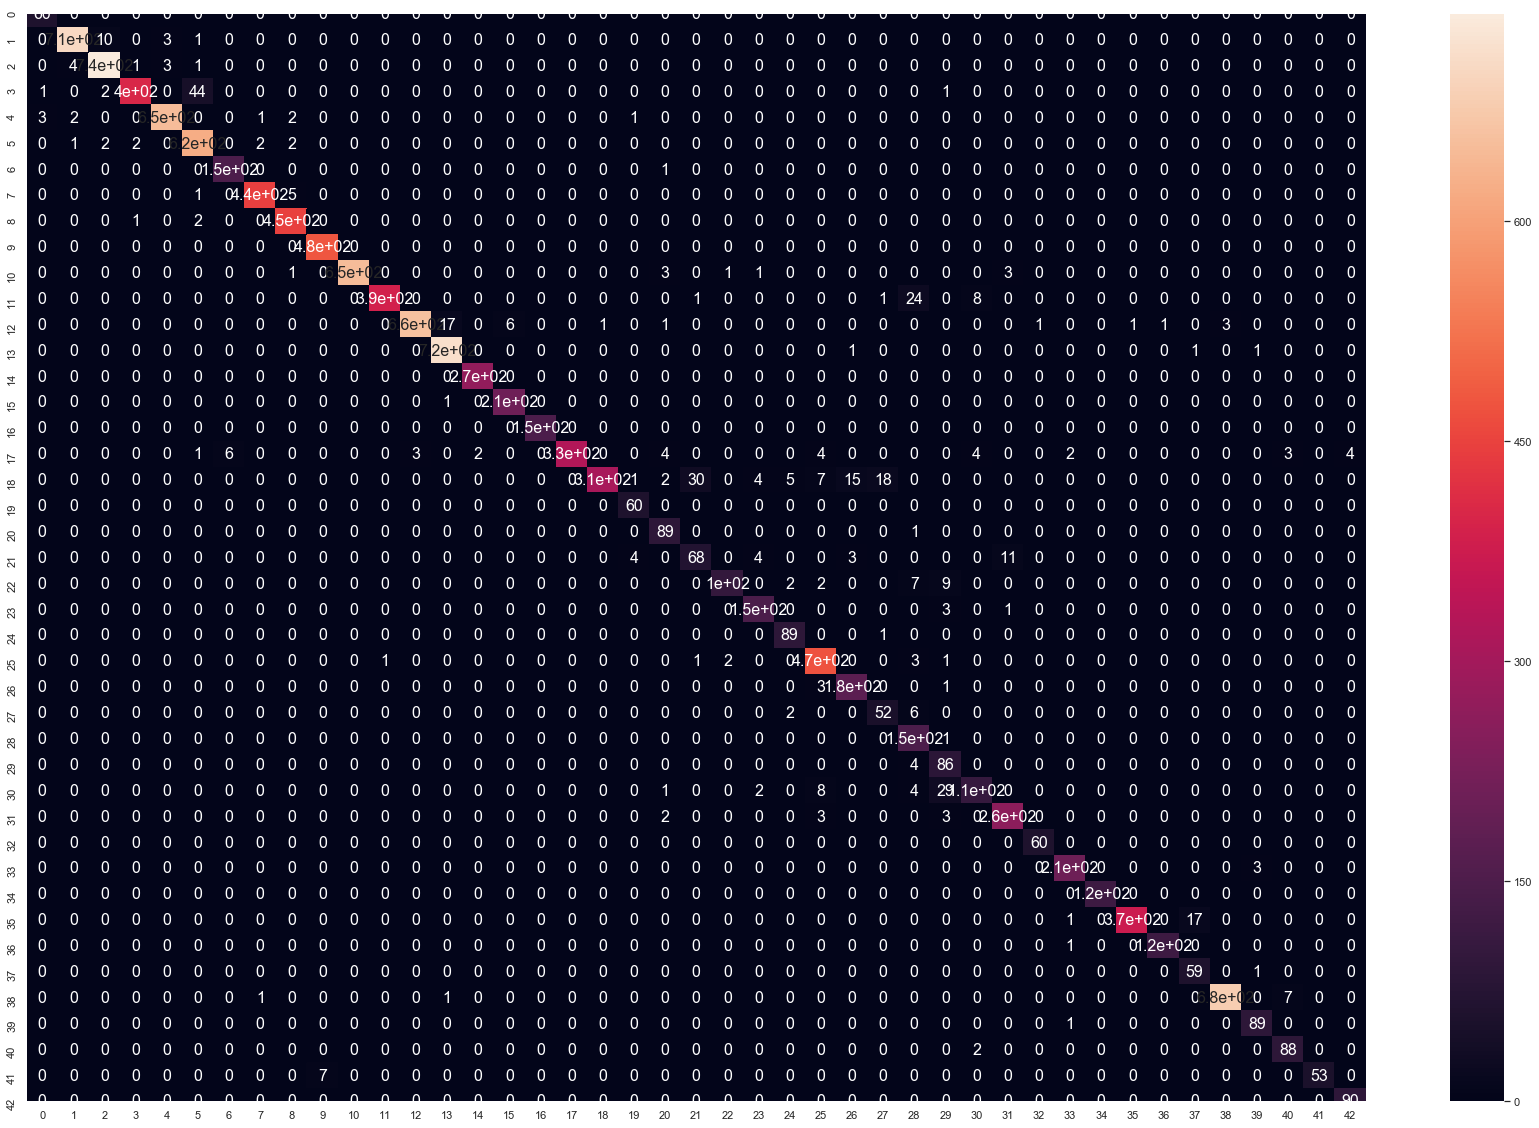

In [24]:
df_cm = pd.DataFrame(conf, range(43), range(43))
plt.figure(figsize=(30,20))
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()